<a href="https://colab.research.google.com/github/Gulayrose/statistics/blob/main/Statistics_Lab2_(Descriptive_Stats_%26_Correlation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#**Descriptive Statistics**

[Seaborn Datasets](https://github.com/mwaskom/seaborn-data)

[Titanic dataset](https://www.kaggle.com/brendan45774/test-file)

In [ ]:
# Load Titanic Dataset


In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Discuss The Dataset

In [4]:
type(df["fare"])

pandas.core.series.Series

In [5]:
fare = np.array(df["fare"])

In [6]:
len(fare)

891

In [ ]:
# Central Tendency Measures

In [7]:
np.mean(fare) # mean median dan buyuyk right skewed

32.204207968574636

In [8]:
np.median(fare)

14.4542

In [ ]:
# Visualize 

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

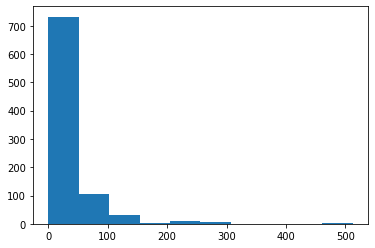

In [10]:
plt.hist(fare)

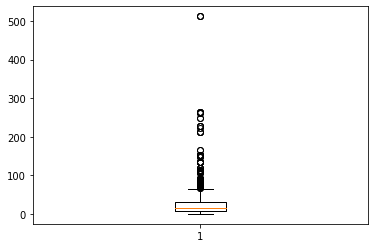

In [11]:
plt.boxplot(fare); # noktali virgul koymazsak verileri gostermez yukardaki gibi

In [12]:
boolarr = fare<100
boolarr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
new_fare = fare[boolarr] # data yi toparlamak icin outlier dan kurtarmak icin baska bir seye atadik


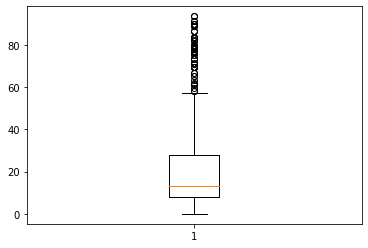

In [17]:
plt.boxplot(new_fare);

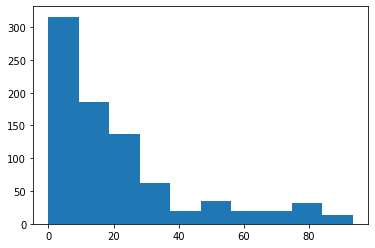

In [18]:
plt.hist(new_fare);

In [19]:
stats.skew(new_fare)

1.6690093839471292

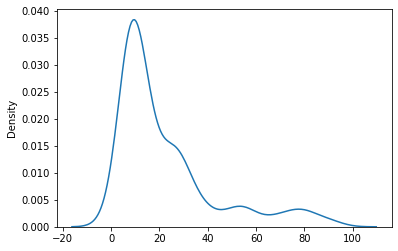

In [20]:
sns.kdeplot(new_fare)

In [ ]:
# Dispersion Measures

In [21]:
np.var(new_fare)

433.2553602824674

In [22]:
np.std(new_fare)

20.814787058302265

In [24]:
q1= np.percentile(new_fare,25)
q1

7.8958

In [25]:
q3 = np.percentile(new_fare,75)
q3

27.7208

In [26]:
np.median(new_fare) # = q2

13.0

In [27]:
iqr = q3-q1
iqr

19.825

In [28]:
stats.iqr(new_fare)

19.825

In [ ]:
# Scatter Plot

In [29]:
#tv_hours vs GPA
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

In [31]:
tv_hours = np.array(tv_hours)
GPA = np.array(GPA)

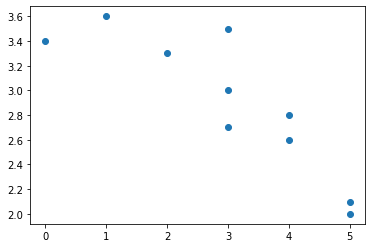

In [32]:
plt.scatter(tv_hours,GPA)

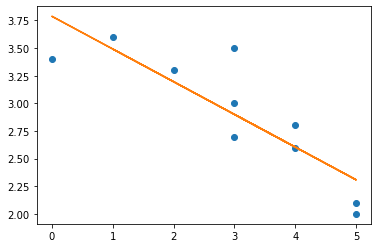

In [33]:
m,b = np.polyfit(tv_hours, GPA, 1)
plt.plot(tv_hours, GPA, 'o')
plt.plot(tv_hours, m*tv_hours + b);

In [ ]:
# Draw a fitting Line

# **Correlation**

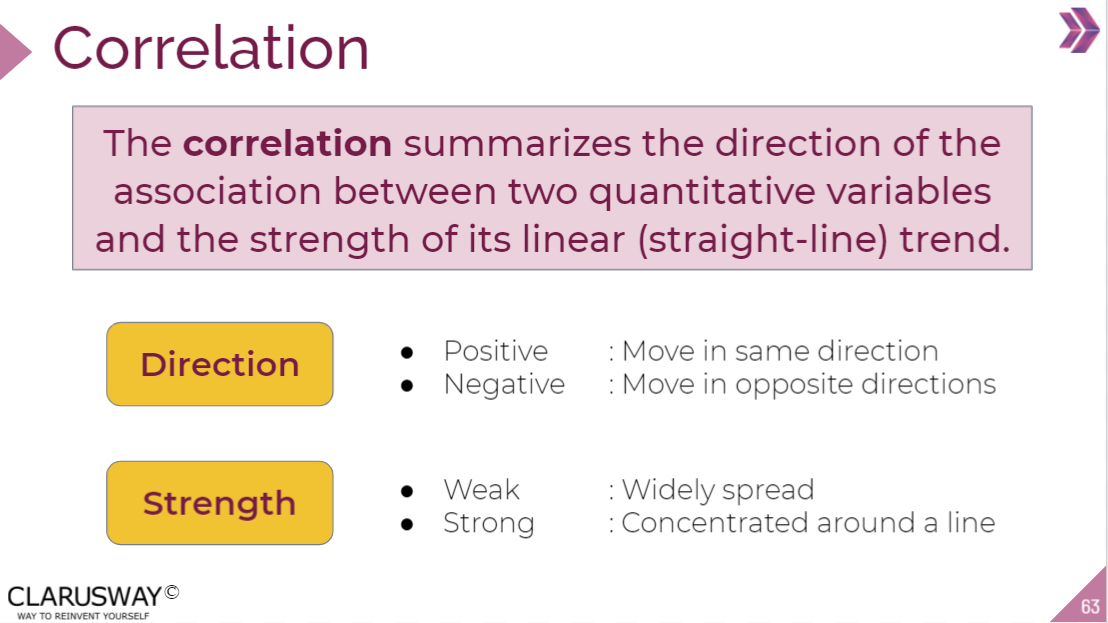

# Manuel (with Formula)

In [35]:
#tv_hours vs GPA
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

Convert the lists to Numpy arrays

In [34]:
x = np.array(tv_hours)
y = np.array(GPA)

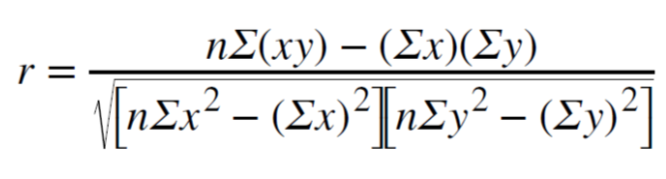

Use Pearson Correlation Formula. First calculate the numerator, second calculate the denominator, then calculate r coeff.

# Scipy

In [37]:
r , p = stats.pearsonr(x,y)
r

-0.8569780755138502

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [38]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.8643457510060754, pvalue=0.0012537299375704556)

Calculate Kendall’s tau, a correlation measure for ordinal data.

Kendall’s tau is a measure of the correspondence between two rankings.

In [39]:
stats.kendalltau(x,y)

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

## Numpy

Calculate covariance with Numpy

In [40]:
np.cov(x,y)

array([[ 2.66666667, -0.78888889],
       [-0.78888889,  0.31777778]])

In [41]:
stats.tvar(x)

2.6666666666666665

In [42]:
stats.tvar(y)

0.3177777777777777

Calculate the correlation coefficients with Numpy

In [43]:
np.corrcoef(x,y)

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])